## Start

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fast_gen import *
from learner import *
from pt_models import *
from dataset_pt import *
from sgdr_pt import *

In [2]:
bs=48; sz=64
f_model = resnet34
path = "/data/jhoward/fast/dogscats/"

In [4]:
tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
data_full = ImageClassifierData.from_paths(path, bs, tfms, test_name='test1')

In [5]:
data = data_full.resize(128, 'tmp') if sz<=90 else data_full

In [7]:
learn = Learner.pretrained_convnet(f_model, data, ps=0.2)

In [8]:
lrf=learn.lr_find(True)

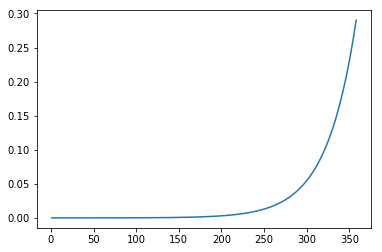

In [9]:
learn.sched.plot_lr()

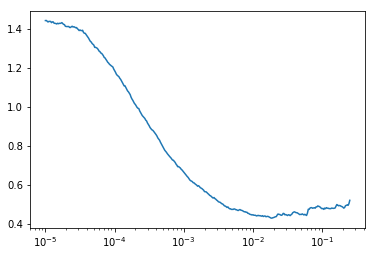

In [10]:
learn.sched.plot()

In [11]:
learn.fit(1e-2, 3, do_fc=True)

[ 0.298945  0.25961   0.8985  ]


[ 0.266324  0.237407  0.9035  ]


[ 0.271935  0.24636   0.893   ]



In [12]:
learn.fit(1e-2, 3, cycle_len=1, cycle_mult=2)

[ 0.279874  0.227781  0.906   ]


[ 0.259264  0.232315  0.9015  ]


[ 0.242244  0.225819  0.908   ]


[ 0.273143  0.227458  0.9065  ]


[ 0.257861  0.220763  0.9065  ]


[ 0.232115  0.219149  0.911   ]


[ 0.238761  0.218795  0.912   ]



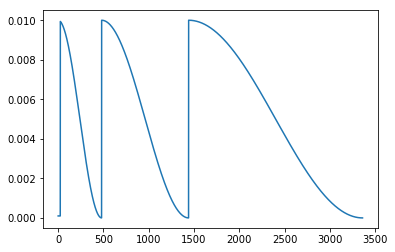

In [13]:
learn.sched.plot_lr()

In [40]:
learn.save('64_fc')

In [42]:
lr=np.array([1e-3,3e-3,1e-2])

In [43]:
learn.unfreeze()

In [37]:
learn.load('64_fc')

In [25]:
learn.lr_find()

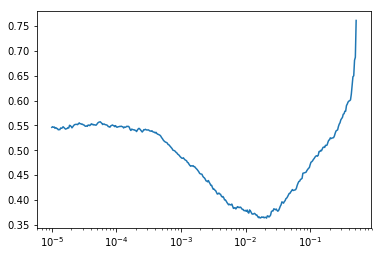

In [26]:
learn.sched.plot()

In [44]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

[ 0.220189  0.190262  0.929   ]


[ 0.163773  0.152438  0.945   ]


[ 0.122239  0.143135  0.9435  ]


[ 0.140748  0.138558  0.9445  ]


[ 0.104053  0.132337  0.9515  ]


[ 0.097522  0.129431  0.9545  ]


[ 0.068495  0.123808  0.957   ]



In [45]:
accuracy(*learn.TTA())

0.96350000000000002

### 299x299

In [14]:
sz=299

In [15]:
tfms = ClassifierData.tfms_from_model(f_model, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ClassifierData.from_paths(path, bs, tfms, test_name='test1')

In [16]:
learn = Learner.pretrained_convnet(f_model, data)

In [17]:
learn.fit(1e-2, 2, do_fc=True, cycle_len=1)

[0.05884211154184065, 0.0264923, 0.99050000000000005]


[0.05814102690093911, 0.025301116, 0.99050000000000005]



In [18]:
learn.fit(1e-2, 1, cycle_len=1)

[0.04736441410157369, 0.02585789, 0.99050000000000005]



In [19]:
accuracy(learn.TTA(), data.val_y)

0.99299999999999999

In [20]:
learn.save('299_fc_no')

In [25]:
lr=np.array([1e-4,1e-3,1e-2])

In [22]:
learn.unfreeze()

In [23]:
learn.fit(lr, 6, cycle_len=2)

[0.07448422934061028, 0.022642815, 0.99199999999999999]


[0.02961284928833177, 0.020311372, 0.99299999999999999]


[0.03323013857468358, 0.017356623, 0.99399999999999999]


[0.02217391573079535, 0.01759835, 0.99450000000000005]


[0.030861150126552692, 0.017341657, 0.995]


[0.0152795648406417, 0.016725346, 0.99399999999999999]



In [24]:
accuracy(learn.TTA(), data.val_y)

0.995

In [26]:
learn.save('299_no')

In [27]:
learn.fit(lr/5, 4, cycle_len=2)

[0.018598911362732364, 0.017697394, 0.99450000000000005]


[0.017195310653336345, 0.01778898, 0.99350000000000005]


[0.015270161866629032, 0.017469874, 0.995]


[0.01394894182591191, 0.01784963, 0.995]



## End

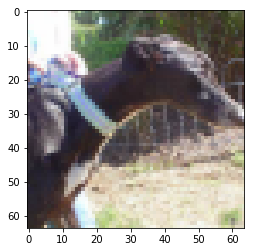

In [56]:
tfm=Transforms(64, [Scale(64)], rand_crop=True)
data = ClassifierData.from_paths(data.path, 2, (tfm, tfm))
x,y=next(iter(ds.val_dl))
plt.imshow(np.rollaxis(x[0].numpy(),0,3));

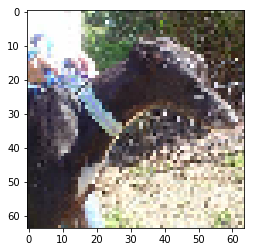

In [15]:
im=PIL.Image.open(data_full.path+'/'+data_full.val_dl.dataset.fnames[0])
plt.imshow(cv2.resize(np.array(im), (64,64), interpolation=cv2.INTER_NEAREST));

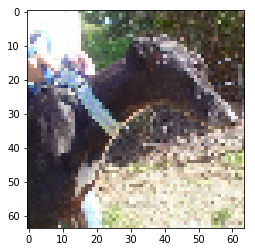

In [12]:
im=PIL.Image.open(data_full.path+'/'+data_full.val_dl.dataset.fnames[0])
plt.imshow(cv2.resize(np.array(im), (64,64)));